In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print("Import All Packages.")

Import All Packages.


In [2]:
data_path = r"C:/Users/saran/OneDrive/Desktop/PatrollQ/PatrolIQ Clean/partrollq_data_clean.csv"

df = pd.read_csv(data_path)
df = df.drop(["id"], axis=1)

df.head(3)

,case_number,date,block,iucr,primary_type,description,location_description,arrest,domestic,beat,...,fbi_code,x_coordinate,y_coordinate,year,updated_on,latitude,longitude,location,month,month_name
0,JG480008,2023-10-26 19:36:00,004XX S PLYMOUTH CT,051A,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,113,...,04A,1176141.0,1898406.0,2023,2023-11-03 15:41:45,41.876587,-87.628727,"\n, \n(41.876587174, -87.628727499)",10,October
1,JG480569,2023-10-26 19:38:00,009XX S RACINE AVE,0810,THEFT,OVER $500,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,1231,...,06,1168521.0,1895981.0,2023,2023-11-03 15:41:45,41.870101,-87.656776,"\n, \n(41.870101037, -87.656775686)",10,October
2,JG480079,2023-10-26 19:38:00,009XX E 57TH ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,235,...,07,1183288.0,1867410.0,2023,2023-11-03 15:41:45,41.791368,-87.603453,"\n, \n(41.791368149, -87.603453398)",10,October


In [4]:
df.columns

Index(['case_number', 'date', 'block', 'iucr', 'primary_type', 'description',
       'location_description', 'arrest', 'domestic', 'beat', 'district',
       'ward', 'community_area', 'fbi_code', 'x_coordinate', 'y_coordinate',
       'year', 'updated_on', 'latitude', 'longitude', 'location', 'month',
       'month_name'],
      dtype='object')

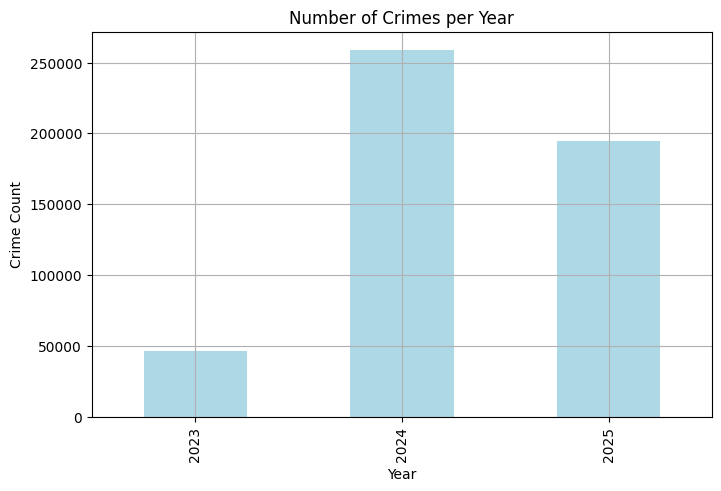

In [20]:
plt.figure(figsize=(8,5))
df['year'].value_counts().sort_index().plot(kind='bar', color='lightblue')
plt.title("Number of Crimes per Year")
plt.xlabel("Year")
plt.ylabel("Crime Count")
plt.grid()
plt.show()


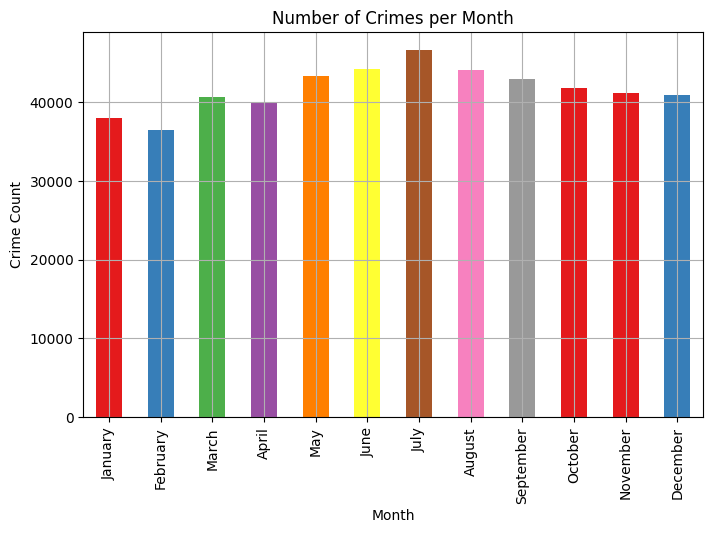

In [18]:
plt.figure(figsize=(8,5))
colors = sns.color_palette("Set1", 10)
df['month_name'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
]).plot(kind='bar', color=colors)
plt.title("Number of Crimes per Month")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.grid()
plt.show()


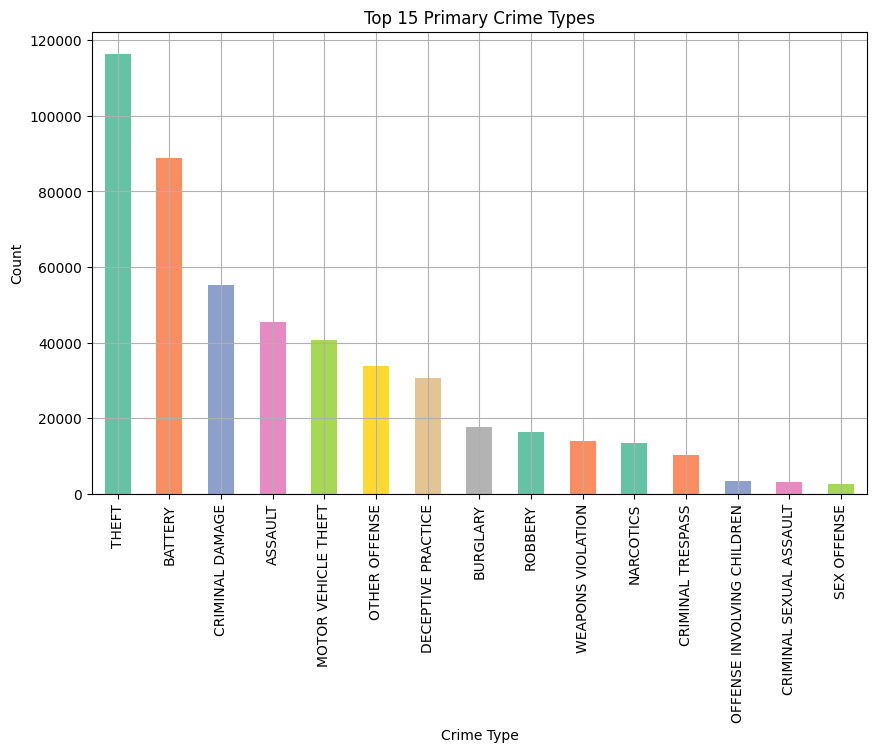

In [53]:
plt.figure(figsize=(10,6))
colors = sns.color_palette("Set2", 10)
df['primary_type'].value_counts().head(15).plot(kind='bar', color=colors)
plt.title("Top 15 Primary Crime Types")
plt.xlabel("Crime Type")
plt.ylabel("Count")
plt.grid()
plt.show()


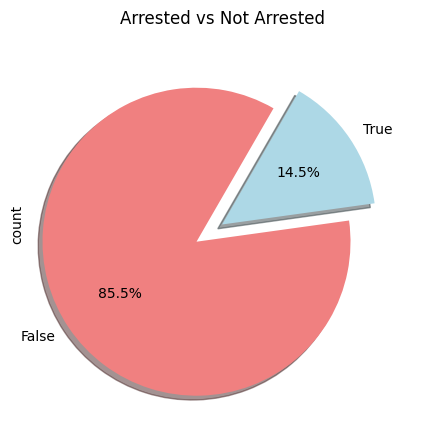

In [30]:
plt.figure(figsize=(5,5))
df['arrest'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral','lightblue'], shadow=True, explode=[0.2, 0], startangle=60)
plt.title("Arrested vs Not Arrested")
plt.show()


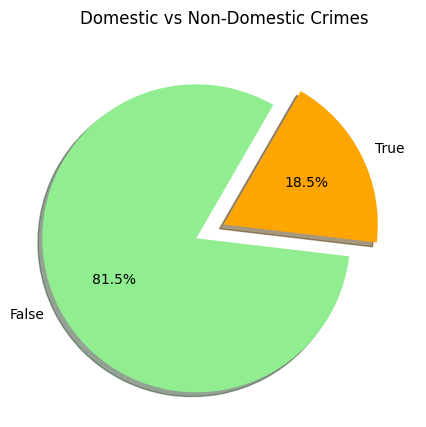

In [31]:
plt.figure(figsize=(5,5))
df['domestic'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen','orange'], shadow=True, explode=[0.2, 0], startangle=60)
plt.title("Domestic vs Non-Domestic Crimes")
plt.ylabel("")
plt.show()


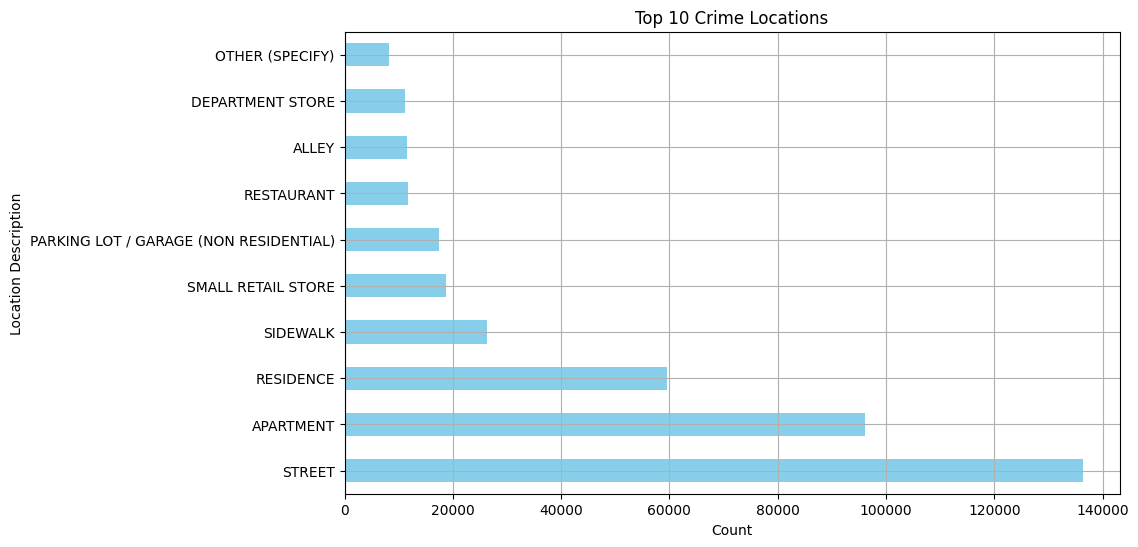

In [32]:
plt.figure(figsize=(10,6))
df['location_description'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Crime Locations")
plt.xlabel("Count")
plt.ylabel("Location Description")
plt.grid()
plt.show()


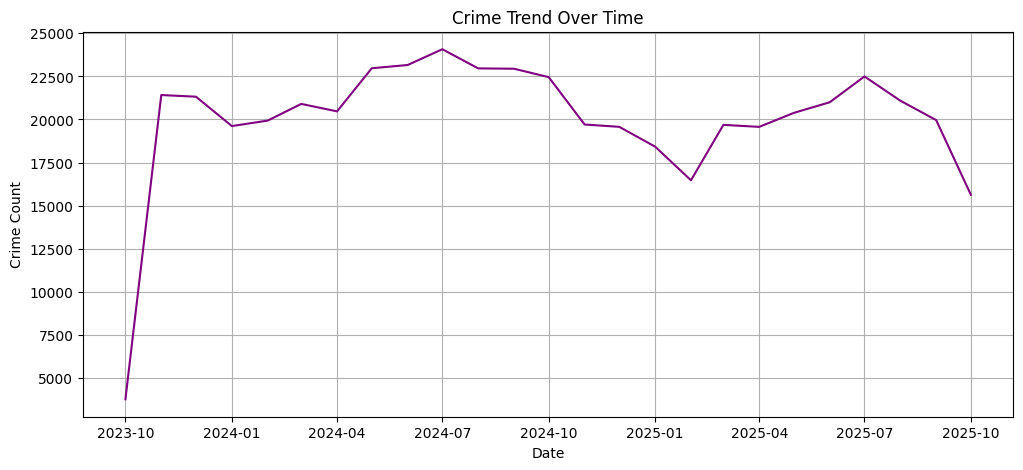

In [10]:
monthly_trend = df.groupby(['year','month'])['case_number'].count().reset_index()
monthly_trend['date'] = pd.to_datetime(monthly_trend['year'].astype(str) + '-' + monthly_trend['month'].astype(str) + '-01')

plt.figure(figsize=(12,5))
plt.plot(monthly_trend['date'], monthly_trend['case_number'], color='purple')
plt.title("Crime Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Crime Count")
plt.grid(True)
plt.show()


C:\Users\saran\AppData\Local\Temp\ipykernel_4328\1021825100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=arrest_rate.values, y=arrest_rate.index, palette="viridis")


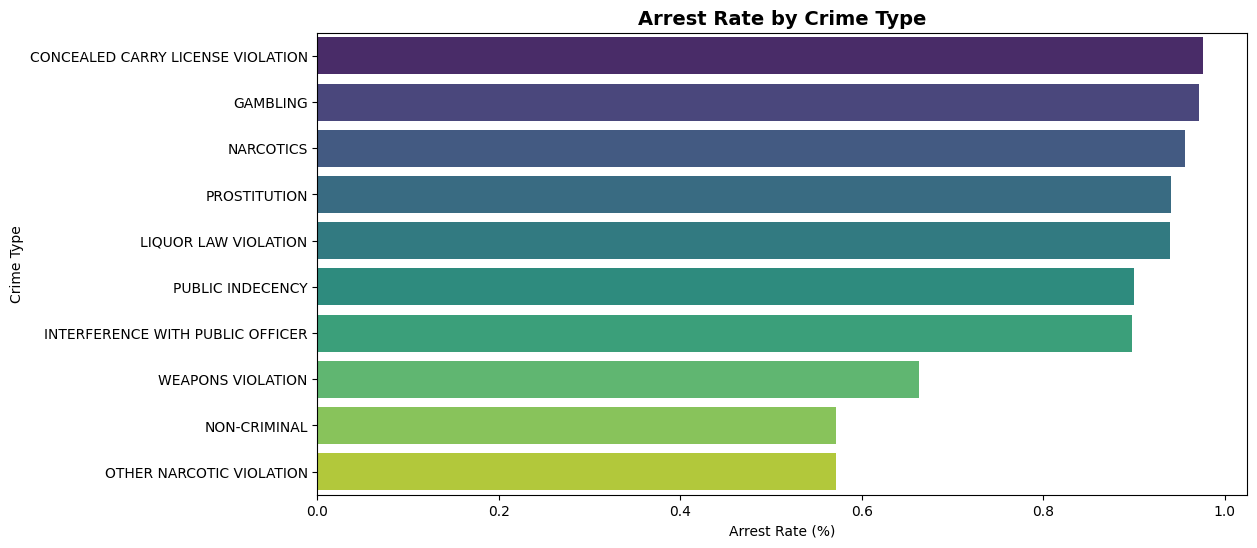

In [37]:
plt.figure(figsize=(12,6))
arrest_rate = df.groupby('primary_type')['arrest'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=arrest_rate.values, y=arrest_rate.index, palette="viridis")
plt.title("Arrest Rate by Crime Type", fontsize=14, fontweight="bold")
plt.xlabel("Arrest Rate (%)")
plt.ylabel("Crime Type")
plt.show()


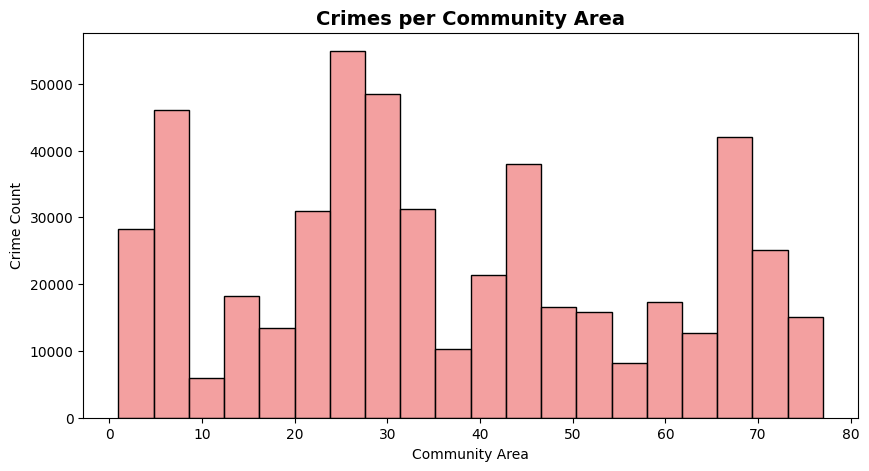

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(df['community_area'].dropna(), bins=20, color='lightcoral')
plt.title("Crimes per Community Area", fontsize=14, fontweight="bold")
plt.xlabel("Community Area")
plt.ylabel("Crime Count")
plt.show()


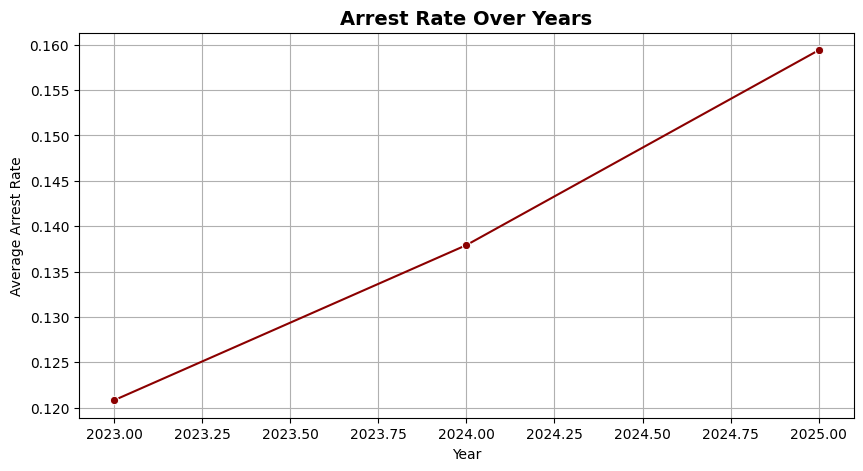

In [44]:
plt.figure(figsize=(10,5))

arrest_trend = df.groupby('year')['arrest'].mean()
sns.lineplot(x=arrest_trend.index, y=arrest_trend.values, marker='o', color='darkred')
plt.title("Arrest Rate Over Years", fontsize=14, fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Average Arrest Rate")
plt.grid(True)
plt.show()


C:\Users\saran\AppData\Local\Temp\ipykernel_4328\1594643314.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_fbi.values, y=top_fbi.index, palette="magma")


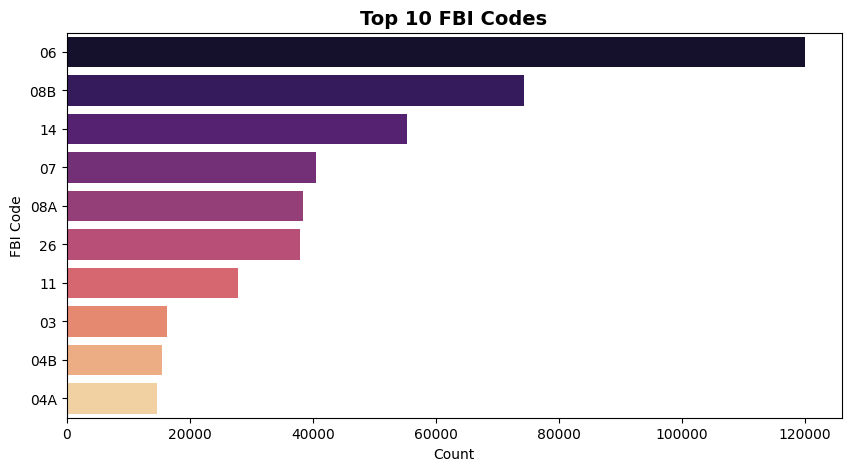

In [46]:
plt.figure(figsize=(10,5))
top_fbi = df['fbi_code'].value_counts().head(10)
sns.barplot(x=top_fbi.values, y=top_fbi.index, palette="magma")
plt.title("Top 10 FBI Codes", fontsize=14, fontweight="bold")
plt.xlabel("Count")
plt.ylabel("FBI Code")
plt.show()


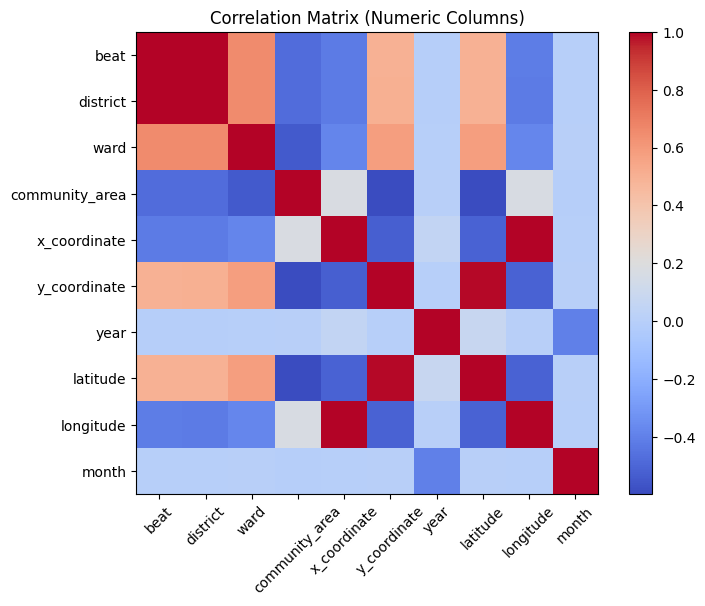

In [9]:
plt.figure(figsize=(8,6))
corr = df.select_dtypes(include=['number']).corr()
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.title("Correlation Matrix (Numeric Columns)")
plt.xticks(range(len(corr)), corr.columns, rotation=45)
plt.yticks(range(len(corr)), corr.columns)
plt.show()
